In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Load the dataset
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)



In [6]:
# Display the first few rows of the dataset
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [7]:
country = 'United Kingdom'
df_country = df[df['location'] == country]

In [8]:
# Convert date column to datetime
df_country['date'] = pd.to_datetime(df_country['date'])

<ipython-input-8-6c349555f464>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['date'] = pd.to_datetime(df_country['date'])


In [10]:
print (df_country)

       iso_code continent        location       date  total_cases  new_cases  \
401777      GBR    Europe  United Kingdom 2020-01-05          0.0        0.0   
401778      GBR    Europe  United Kingdom 2020-01-06          0.0        0.0   
401779      GBR    Europe  United Kingdom 2020-01-07          0.0        0.0   
401780      GBR    Europe  United Kingdom 2020-01-08          0.0        0.0   
401781      GBR    Europe  United Kingdom 2020-01-09          0.0        0.0   
...         ...       ...             ...        ...          ...        ...   
403446      GBR    Europe  United Kingdom 2024-07-31   24971229.0        0.0   
403447      GBR    Europe  United Kingdom 2024-08-01   24971229.0        0.0   
403448      GBR    Europe  United Kingdom 2024-08-02   24971229.0        0.0   
403449      GBR    Europe  United Kingdom 2024-08-03   24971229.0        0.0   
403450      GBR    Europe  United Kingdom 2024-08-04   24974629.0     3400.0   

        new_cases_smoothed  total_death

In [11]:
# Drop rows with missing values for analysis
df_country = df_country[['date', 'new_cases', 'total_vaccinations', 'population']].dropna()

In [21]:
print(df.columns.tolist())

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

In [23]:
# Calculate vaccination rate as a percentage
df_country['vaccination_rate'] = (df_country['total_vaccinations'] / df_country['population']) * 100


In [12]:
# Set date as index for easier plotting
df_country.set_index('date', inplace=True)

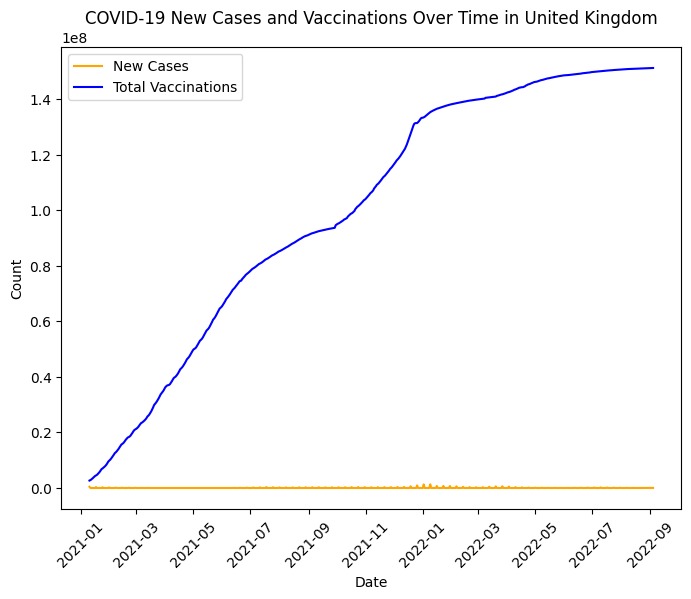

In [14]:
# Visualize new cases and vaccinations over time
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_country, x=df_country.index, y='new_cases', label='New Cases', color='orange')
sns.lineplot(data=df_country, x=df_country.index, y='total_vaccinations', label='Total Vaccinations', color='blue')
plt.title(f'COVID-19 New Cases and Vaccinations Over Time in {country}')
plt.ylabel('Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

This code performs a time series decomposition of COVID-19 new cases data to analyze its underlying patterns. Using the `seasonal_decompose` function with an additive model, the time series is split into three components: **trend**, which shows the long-term movement in new cases; **seasonality**, which reveals recurring weekly patterns (with a period of 7 days); and **residuals**, which capture random noise or unexplained variations. The decomposition helps in understanding both the overall trend in case numbers and any cyclical patterns that repeat over time. The resulting plot visualizes these components, providing insights into the dynamics of new COVID-19 cases over time.

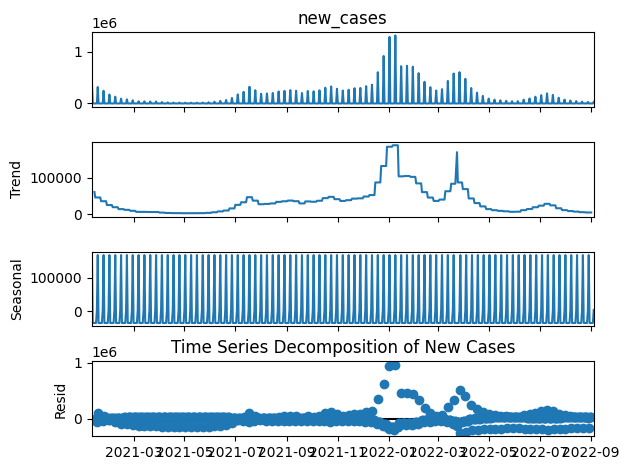

In [17]:
# Perform time series decomposition
decomposition = seasonal_decompose(df_country['new_cases'], model='additive', period=7)
decomposition.plot()
plt.title('Time Series Decomposition of New Cases')
plt.show()

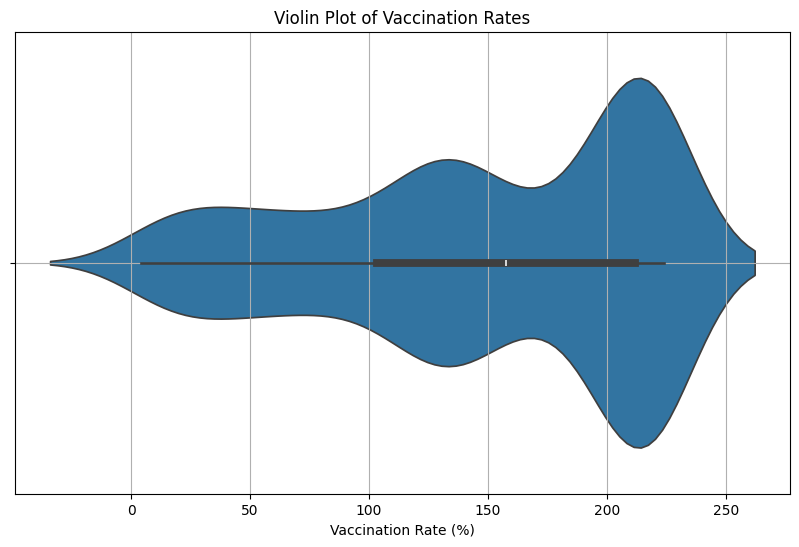

In [28]:
#  Violin Plot for Vaccination Rates
plt.figure(figsize=(10, 6))
sns.violinplot(x='vaccination_rate', data=df_country)
plt.title('Violin Plot of Vaccination Rates')
plt.xlabel('Vaccination Rate (%)')
plt.grid(True)
plt.show()

<ipython-input-26-945e587016f8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg_vaccination.index, y=monthly_avg_vaccination.values, palette='Blues_d')


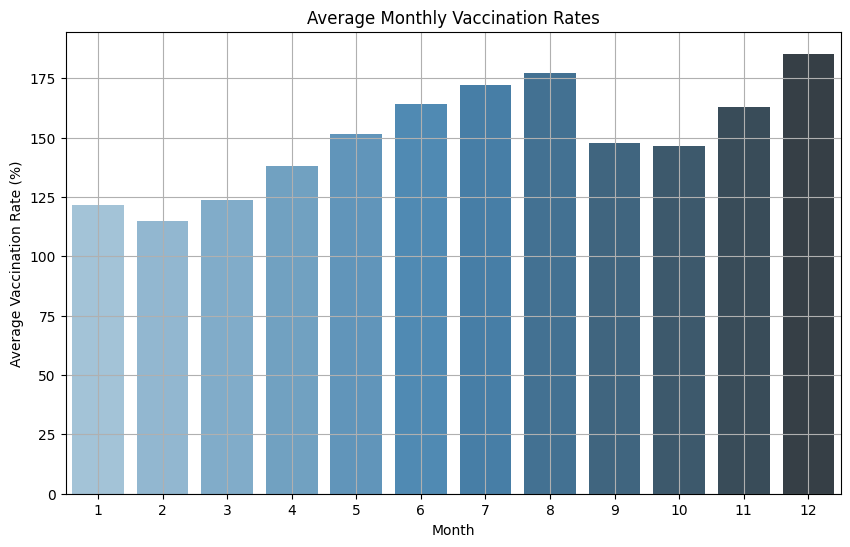

In [26]:
# Bar Plot for Vaccination Rates (Group by Month)
df_country['month'] = df_country.index.month
monthly_avg_vaccination = df_country.groupby('month')['vaccination_rate'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg_vaccination.index, y=monthly_avg_vaccination.values, palette='Blues_d')
plt.title('Average Monthly Vaccination Rates')
plt.xlabel('Month')
plt.ylabel('Average Vaccination Rate (%)')
plt.grid(True)
plt.show()
